#HomeWork №4


In [ ]:
import sklearn
import regex as re
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')
import os
from nltk.tokenize import word_tokenize
from os.path import join

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
file = open("/content/drive/MyDrive/Programarea-mea/NLP/Homeworks/BIO_CS_DATA/TEST/biology/class_11_biology_chapter_1_0 (1).txt")
text = file.read()
stop_words = stopwords.words('english')
porter = PorterStemmer()
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Task 1
class TextNormalizer:
  def __init__(self):
    self = self

  def normalize(self, text):
    text = text.replace('\n', ' ').replace('\r', ' ')
    text = text.lower()
    text = ' '.join(re.findall('[a-z]+', text))
    return text

In [ ]:
#Task 2
from nltk.probability import FreqDist
class WordsExtractor:
  def __init__(self,stop_words):
    self.stop_words = stop_words
    self.textul = None
  
  def _fit(self, frequency):
    return frequency.hapaxes()

  def transform(self, text):
    frequency = FreqDist(text.split(' '))
    hapaxes_list = self._fit(frequency)
    self.textul = ' '.join(c for c in text.split(' ') if c not in hapaxes_list and c not in self.stop_words)
    return self.textul

  

In [ ]:
#Task 3
class ApplyStemmer:
  def __init__(self, folder_path, stemmer):
    self.__folder_path = folder_path
    self.stemmer = stemmer
    self.classes_ = os.listdir(self.__folder_path)
    self.cls_dict = {}

    for cls in self.classes_:
      self.cls_dict[cls] = []
      for file_path in os.listdir(join(self.__folder_path, cls)):
        self.cls_dict[cls].append(join(self.__folder_path, cls, file_path))
  
  def __getitem__(self, cls):
    return open(self.cls_dict[cls[0]][cls[1]], 'r', encoding='utf-8').read()
    
  def text_curat(self):
    for cls in self.cls_dict:
      for thing in self.cls_dict[cls]: 
        text= str(open(thing, 'r', encoding='utf-8').read())
        text = WordsExtractor(stop_words).transform(text)
        text2 = ''
        text2 = ' '.join([self.stemmer.stem(word) for word in word_tokenize(text) if word is not None])  
        name = thing[:-4]
        f = open(name+'(2).txt', "x")
        f.write(text2)
        f.close()
  

In [ ]:
a = TextNormalizer()
b = a.normalize(text)

stop_words = stopwords.words('english')
c = WordsExtractor(stop_words)
d = c.transform(b)
d

In [ ]:
path = '/content/drive/MyDrive/Programarea-mea/NLP/Homeworks/BIO_CS_DATA/TEST'
G = ApplyStemmer(path,porter)
G.text_curat()

#HomeWork №5


In [1]:
import pandas as pd

In [2]:
#Import the data
df = pd.read_csv('/content/drive/MyDrive/Programarea-mea/NLP/Homeworks/heart.csv')

In [3]:
#Analyse the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
X_train = df.drop('target', axis = 1)
y_train = df.target

In [67]:
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

In [7]:
f = df.values

In [8]:
clf = IsolationForest(random_state=0).fit(f)

In [9]:
clf.predict(df)

array([-1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,
       -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1, -1,  1, -1,
        1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1,
       -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1, -1,
       -1, -1, -1,  1, -1

In [18]:
df_cleaned = df[np.where(clf.predict(df)== 1, True, False)]

In [26]:
df_cleaned

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [21]:
X = df_cleaned.drop('target', axis = 1)
y = df_cleaned.target

In [23]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

In [32]:
model = LogisticRegression(max_iter = 4000).fit(X_train, y_train)

In [33]:
predicted = model.predict(X_test)

In [34]:
predicted

array([1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1])

In [35]:
from sklearn.metrics import accuracy_score

In [60]:
lregresion_score = accuracy_score(predicted, y_test)

In [61]:
lregresion_score

0.8382352941176471

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        28
           1       0.86      0.93      0.89        40

    accuracy                           0.87        68
   macro avg       0.87      0.86      0.86        68
weighted avg       0.87      0.87      0.87        68



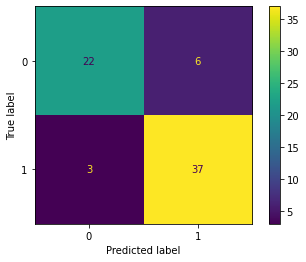

In [79]:
plot_confusion_matrix(model, X_test, y_test)
print(classification_report(y_test, model.predict(X_test)))

In [39]:
from sklearn.naive_bayes import ComplementNB, BernoulliNB, MultinomialNB


0.7794117647058824
              precision    recall  f1-score   support

           0       0.74      0.71      0.73        28
           1       0.80      0.82      0.81        40

    accuracy                           0.78        68
   macro avg       0.77      0.77      0.77        68
weighted avg       0.78      0.78      0.78        68



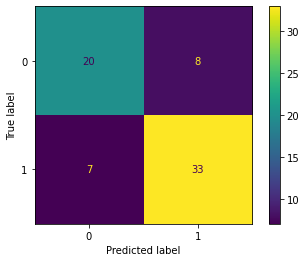

In [78]:
#ComplementNB
Complement = ComplementNB().fit(X_train, y_train)
Complement_score = accuracy_score(Complement.predict(X_test), y_test)
print(Complement_score)
plot_confusion_matrix(Complement, X_test, y_test)
print(classification_report(y_test, Complement.predict(X_test)))

0.8382352941176471
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        28
           1       0.87      0.85      0.86        40

    accuracy                           0.84        68
   macro avg       0.83      0.84      0.83        68
weighted avg       0.84      0.84      0.84        68



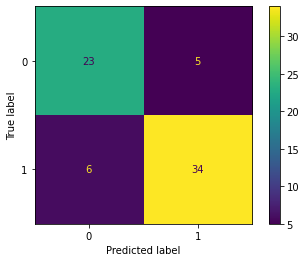

In [77]:
#BernoulliNB
Bernoulli = BernoulliNB().fit(X_train, y_train)
Bernoulli_score = accuracy_score(Bernoulli.predict(X_test), y_test)
print(Bernoulli_score)
plot_confusion_matrix(Bernoulli, X_test, y_test)
print(classification_report(y_test, Bernoulli.predict(X_test)))

0.7794117647058824
              precision    recall  f1-score   support

           0       0.74      0.71      0.73        28
           1       0.80      0.82      0.81        40

    accuracy                           0.78        68
   macro avg       0.77      0.77      0.77        68
weighted avg       0.78      0.78      0.78        68



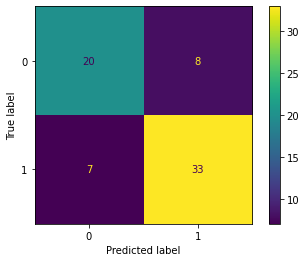

In [76]:
#MultinomialNB
Multinomial = MultinomialNB().fit(X_train, y_train)
Multinomial_score = accuracy_score(Multinomial.predict(X_test), y_test)
print(Multinomial_score)
plot_confusion_matrix(Multinomial, X_test, y_test)
print(classification_report(y_test, Multinomial.predict(X_test)))

In [46]:
from sklearn.svm import SVC

0.6323529411764706
              precision    recall  f1-score   support

           0       1.00      0.11      0.19        28
           1       0.62      1.00      0.76        40

    accuracy                           0.63        68
   macro avg       0.81      0.55      0.48        68
weighted avg       0.77      0.63      0.53        68



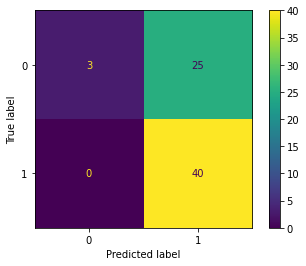

In [75]:
svc = SVC().fit(X_train, y_train)
svc_score = accuracy_score(svc.predict(X_test), y_test)
print(svc_score)
plot_confusion_matrix(svc, X_test, y_test)
print(classification_report(y_test, svc.predict(X_test)))

In [49]:
from sklearn.ensemble import RandomForestClassifier

0.8676470588235294
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        28
           1       0.86      0.93      0.89        40

    accuracy                           0.87        68
   macro avg       0.87      0.86      0.86        68
weighted avg       0.87      0.87      0.87        68



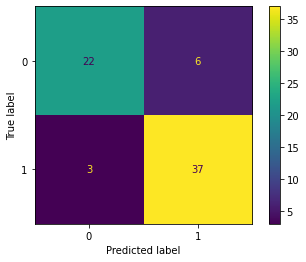

In [74]:
model = RandomForestClassifier().fit(X_train, y_train)
forest_score = accuracy_score(model.predict(X_test), y_test)
print(forest_score)
plot_confusion_matrix(model, X_test, y_test)
print(classification_report(y_test, model.predict(X_test)))

0.6911764705882353
              precision    recall  f1-score   support

           0       0.67      0.50      0.57        28
           1       0.70      0.82      0.76        40

    accuracy                           0.69        68
   macro avg       0.68      0.66      0.67        68
weighted avg       0.69      0.69      0.68        68



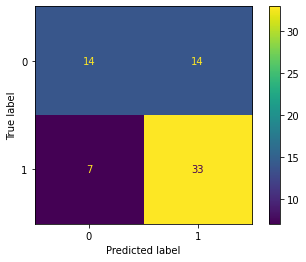

In [73]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier().fit(X_train, y_train)
knn_score = accuracy_score(knn.predict(X_test), y_test)
print(score)
plot_confusion_matrix(knn, X_test, y_test)
print(classification_report(y_test, knn.predict(X_test)))

0.5882352941176471
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.59      1.00      0.74        40

    accuracy                           0.59        68
   macro avg       0.29      0.50      0.37        68
weighted avg       0.35      0.59      0.44        68



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


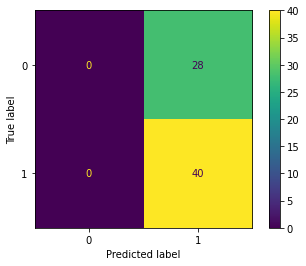

In [72]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron().fit(X_train, y_train)
perceptron_score = accuracy_score(perceptron.predict(X_test),y_test)
print(perceptron_score)
plot_confusion_matrix(perceptron, X_test, y_test)
print(classification_report(y_test, perceptron.predict(X_test)))

0.7941176470588235
              precision    recall  f1-score   support

           0       0.79      0.68      0.73        28
           1       0.80      0.88      0.83        40

    accuracy                           0.79        68
   macro avg       0.79      0.78      0.78        68
weighted avg       0.79      0.79      0.79        68



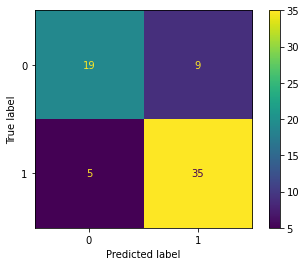

In [71]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier().fit(X_train, y_train)
tree_score = accuracy_score(tree.predict(X_test), y_test)
print(tree_score)
plot_confusion_matrix(tree, X_test, y_test)
print(classification_report(y_test, tree.predict(X_test)))

In [81]:
tabel = {
    'Logistic Regression': [lregresion_score],
    'ComplementNB': [Complement_score],
    'BernoulliNB': [Bernoulli_score],
    'Mutinomail Regression': [Multinomial_score],
    'Perceptron':[perceptron_score],
    'K-nearest neighbors': [knn_score],
    'SVM': [svc_score],
    'Decision Tree': [tree_score],
    'RandomForestClassifier': [forest_score]
}

tabel_df = pd.DataFrame.from_dict(tabel)
tabel_df

,Logistic Regression,ComplementNB,BernoulliNB,Mutinomail Regression,Perceptron,K-nearest neighbors,SVM,Decision Tree,RandomForestClassifier
0,0.838235,0.779412,0.838235,0.779412,0.588235,0.691176,0.632353,0.794118,0.867647


Cel mai precis model este RandomForestClassifier, cu acuratetea de 86%.Avand 68 de exemplare, astfel prezicand negativ 3 elemente, care de fapt erau pozitive, si respectiv 6 elemente pozitive, care de fapt erau negative. 